### Simple Linear Regression
Linear regression is among the simplest regression methods. One of the main advantages of using it is ease of interpreting results. Simple linear regression is special case of regression where target feature is dependent on single variable, and then we find the best fitting line.<br>

##### y = m*x + c <br>

#### Dataset
The dataset is available at __"data/simple_linear_data.csv"__ in the respective challenge's repo.<br><br>
This is the modified version of the dataset 'Student Performance' provided by UCI Machine Learning repository.<br>
Original dataset: https://archive.ics.uci.edu/ml/datasets/student+performance

#### Features (X)
- G2 - second year math grades (numeric: from 0 to 100)

#### Target (y)
- G3 - third year math grades (numeric: from 0 to 100, output target)

#### Objective
To gain understanding of single linear regression through implementing the model from scratch

#### Tasks
- Read the data from above mentioned dataset and define X and y as numpy array
- Add column at position 0 with all values=1 (pandas.DataFrame.insert function)
- Print rows from 40 to 55.
- Print the shape and datatype of both X and y
- Follow code cells to implement simple linear regression from scratch
    - Write hypothesis function to predict values
    - Write function for calculating mean_squared_error
    - Write function to return gradients for given weights
    - Perform gradient descent taking help of above functions

#### Further Fun (will not be evaluated
- Remove outliers, train again and see the difference in error.
```python
# Add this line before defining X and y
data = data[(data['G3']!=0)|((data['G2']==0)&(data['G3']==0))]
```
- Replace "*weights = np.random.rand(2)*" line in gradient descent with below line, train again and visualize results.
```python
# Replace above line with following in gradient descent function
weights = np.zeros(2,)
```
- Play with learning rate and max_iterations
- Generalize the code for multivariate(multiple) linear regression

#### Resources
- Linear regression maths: https://www.youtube.com/watch?v=ZkjP5RJLQF4
- Simple linear regression: https://www.youtube.com/watch?v=iAgYLRy7e20
- Tutorial: https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python


In [1]:
!wget "https://raw.githubusercontent.com/ramahanisha-7/Datasets/main/Dataset%20File.csv"

--2021-09-17 16:52:33--  https://raw.githubusercontent.com/ramahanisha-7/Datasets/main/Dataset%20File.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2326 (2.3K) [text/plain]
Saving to: ‘Dataset File.csv’

Dataset File.csv    100%[===================>]   2.27K  --.-KB/s    in 0s      

2021-09-17 16:52:33 (62.9 MB/s) - ‘Dataset File.csv’ saved [2326/2326]



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Read the data from provided dir
data = pd.read_csv("Dataset File.csv")
# print(data)
data.head()

,G2,G3
0,30,30
1,25,30
2,40,50
3,70,75
4,50,50


In [23]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term
data.insert(loc=0, column='bias', value=1)


In [24]:
# Print the dataframe rows
print(data[40:50])


    bias  G2   G3
40     1  50   55
41     1  60   60
42     1  90   90
43     1  40   55
44     1  50   45
45     1  40   30
46     1  60   55
47     1  95  100
48     1  75   70
49     1  35   35


In [25]:
df=np.array(data[:])
print(df)

[[ 1 30 30]
 [ 1 25 30]
 [ 1 40 50]
 ...
 [ 1 40 35]
 [ 1 60 50]
 [ 1 45 45]]


In [26]:
# Define X (input features) and y (output feature) 
X = df[:,:-1]
y = df[:,-1:]
# print(X,y)

In [27]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(395, 2)
y: Type-<class 'numpy.ndarray'>, Shape-(395, 1)


__Expected output__:<br><br>
X: Type-<class 'numpy.ndarray'>, Shape-(395,2)<br>
y: Type-<class 'numpy.ndarray'>, Shape-(395,)

Let us visualize the relationship between X and y

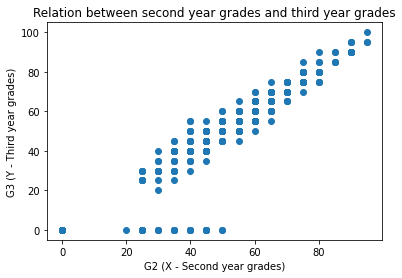

In [28]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(X[:,1],y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

##### Let us start implementing linear regression from scratch. Just follow code cells, see hints if required.

In [29]:
def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###

    print("\n\n Weights: ", weights, "\n\n")

    y_pred = np.dot(X,weights)

    # print("\n\n y_pred: ", y_pred, "\n\n")
    ### END CODE HERE ###
    
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [30]:
def mean_squared_error(y_true, y_pred) : 
    '''
    y_true : (m,1)
    y_pred : (m,1)
    
    Return the mean squared error
    '''
    ### START CODE HERE ###
    # loss = np.square(np.subtract(y_true,y_pred)).mean()
    # n = len(X[:, 1])
    loss = ((y_true - y_pred)**2).mean()

    print("\n\n loss: ", loss, "\n\n")
    ### END CODE HERE ###
    
    return loss

In [42]:
def gradient(X, y_true, y_pred):
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    
    ### START CODE HERE ###
    # n = len(X[:, 1])
    grad[0] = (y_true - y_pred).mean()

    # print("\n\n y_pred_shape: ", y_pred.shape, "\n\n")
    # print("\n\n y_shape: ", y_true.shape, "\n\n")
    # print(np.subtract(y_pred, y_true[:, 0]).shape)

    grad[1] = (X[:, 0] * (y_pred - y_true[:, 0])).mean()

    print("\n\n Grad[0]: ", grad[0], "\n\n")
    print("\n\n Grad[1]: ", grad[1], "\n\n")
    
    ### END CODE HERE ###
    
    return grad

In [43]:
def gradient_descent(X, y, learning_rate=0.01, max_iterations=10):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2)
    # Initialize a list to record all the losses 
    losses  = []
    
    ### START CODE HERE ###

    for i in range(max_iterations):

      y_pred = predict(X, weights)

      losses.append(mean_squared_error(y, y_pred))

      weights -= learning_rate * gradient(X,y,y_pred)


    ### END CODE HERE ###
    
    return weights, losses

##### Congratulations! You have implemented linear regression from scratch. Let's see this in action.

In [44]:
# Perform gradient descent
optimal_weights, losses = gradient_descent(X, y)



 Weights:  [0.39408007 0.38725228] 




 loss:  1533.4160038241073 




 Grad[0]:  30.936911985157018 




 Grad[1]:  -30.936911985157018 




 Weights:  [0.08471095 0.69662139] 




 loss:  909.9439824852847 




 Grad[0]:  14.673494836504215 




 Grad[1]:  -14.673494836504219 




 Weights:  [-0.062024    0.84335634] 




 loss:  822.7977813067628 




 Grad[0]:  6.959694323086236 




 Grad[1]:  -6.959694323086237 




 Weights:  [-0.13162094  0.91295329] 




 loss:  828.3845308057142 




 Grad[0]:  3.3010094466587496 




 Grad[1]:  -3.30100944665875 




 Weights:  [-0.16463104  0.94596338] 




 loss:  841.5897803220463 




 Grad[0]:  1.5656813160291543 




 Grad[1]:  -1.5656813160291538 




 Weights:  [-0.18028785  0.96162019] 




 loss:  850.2276737207943 




 Grad[0]:  0.7426085938178791 




 Grad[1]:  -0.7426085938178789 




 Weights:  [-0.18771394  0.96904628] 




 loss:  854.8588576122357 




 Grad[0]:  0.3522220760804511 




 Grad[1]:  -0.35222207608045086 


In [45]:
# DO NOT CHANGE THE FOLLOWING CODE CELLS
# Print final loss
print("Mean squared error:", losses[-1])

Mean squared error: 858.8415994598446


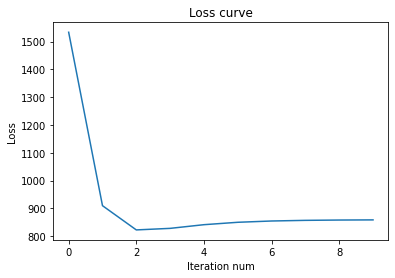

In [46]:
# Plot the loss curve
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [47]:
print(optimal_weights)

[-0.19407496  0.9754073 ]


In [48]:
# Make predictions using trained weights
y_pred = predict(X, optimal_weights)
print(y_pred)



 Weights:  [-0.19407496  0.9754073 ] 


[29.06814411 24.1911076  38.82221713 68.0844362  48.57629015 72.96147271
 58.33036318 24.1911076  87.59258225 72.96147271 38.82221713 58.33036318
 68.0844362  48.57629015 77.83850922 68.0844362  68.0844362  48.57629015
 24.1911076  48.57629015 68.0844362  72.96147271 72.96147271 63.20739969
 43.69925364 43.69925364 58.33036318 77.83850922 53.45332667 58.33036318
 53.45332667 77.83850922 77.83850922 48.57629015 68.0844362  33.94518062
 77.83850922 77.83850922 58.33036318 63.20739969 48.57629015 58.33036318
 87.59258225 38.82221713 48.57629015 38.82221713 58.33036318 92.46961876
 72.96147271 33.94518062 63.20739969 63.20739969 53.45332667 48.57629015
 63.20739969 43.69925364 72.96147271 72.96147271 48.57629015 77.83850922
 53.45332667 38.82221713 48.57629015 43.69925364 48.57629015 72.96147271
 63.20739969 33.94518062 43.69925364 77.83850922 72.96147271 48.57629015
 29.06814411 58.33036318 58.33036318 43.69925364 53.45332667 53.45332667
 38.82221

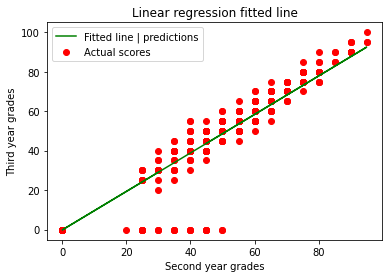

In [49]:
# Visualize the results by plotting it
plt.scatter(X[:,1], y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()